<div class="alert alert-block alert-danger">
    
### Notes 

</div>

### Generalized Linear Models, Logistic, Poisson, Numerical python, $\dots$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats

import statsmodels.api as sm

In [3]:
plt.close('all')

np.random.seed(1234)

<hr/>

#### Logistic Regression

#### Logistic function

$f : \mathbb{R}$ $\rightarrow$ $\mathbb{R}_{[0, 1]}$ by $\frac{e^x}{1+e^x} = \frac{1}{1+e^{-x}}$

$1-f(x) = f(-x) = \frac{1}{1+e^{x}}$

$f^{\prime}(x) = f(x)(1 - f(x)) = f(x)f(-x)$

#### Binary logistic classification

$ P\{ y_i = 1 \mid \mathbf{x}_i, \mathbf{\beta} \} = p_i = \frac{ exp( \mathbf{x^T_i} \mathbf{\beta} )}{1+exp( \mathbf{x^T_i} \mathbf{\beta} )} = \frac{1}{1+exp(-\mathbf{x^T_i} \mathbf{\beta}) } $

$ P\{ y_i = 0 \mid \mathbf{x}_i, \mathbf{\beta} \} = 1 - p_i = \frac{1}{1+exp(\mathbf{x^T_i} \mathbf{\beta})} $

##### Log-likelihood for binary classification

$
\begin{align}
L \{\mathbf{\beta} \mid \mathbf{X}, Y \}
&= \Pi^n_{i=1} p_i^{y_i} (1-p_i)^{1-y_i} \\
\end{align}
$

$
\begin{align}
\ell(\beta)
&= \sum^{n}_{i=1} \{ (y_i) log p_i + (1 - y_i) log(1-p_i) \} \\
&= \sum^{n}_{i=1} \{ (y_i) log (\frac{e^{x^T_i\beta}}{1+e^{x^T_i\beta}}) + (1-y_i)log(\frac{1}{1+e^{x^T_i\beta}}) \} \\
&= \sum^{n}_{i=1} \{ y_i x^T_i\beta - (y_i)log(1+e^{x^T_i\beta}) - log(1+e^{x^T_i\beta}) + (y_i) log(1+e^{x^T_i\beta}) \} \\
&= \sum^{n}_{i=1} \{ y_i x^T_i\beta - log(1+e^{x^T_i\beta}) \}
\end{align}
$

##### Logit link function

- $\mathbb{E}[Y \mid \mathbf{X}] = \mu = p = \frac{e^{\mathbf{x}\mathbf{\beta}}}{1+e^{\mathbf{x}\mathbf{\beta}}} = e^{\mathbf{x}\mathbf{\beta}} (\frac{1}{1+e^{\mathbf{x}\mathbf{\beta}}}) = e^{\mathbf{x}\mathbf{\beta}} (1-p) \implies \frac{p}{1-p} = e^{\mathbf{x}\mathbf{\beta}} \implies log(\frac{p}{1-p}) = {\mathbf{x}\mathbf{\beta}}$

or

- [odds] $\frac{p}{1-p} = \frac{e^{\mathbf{x}\mathbf{\beta}}}{1+e^{\mathbf{x}\mathbf{\beta}}} (1+e^{\mathbf{x}\mathbf{\beta}}) = e^{\mathbf{x}\mathbf{\beta}} = \mu$

- [log-odds (logit)] $log(\frac{ p}{1 - p}) = \mathbf{x} \mathbf{\beta}$

***

In [4]:
data=pd.read_csv('leukemia_remission.txt', sep='\t')
data.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [5]:
endog = data.loc[:,'REMISS'].to_numpy()
exog = data.drop('REMISS', axis=1)

In [6]:
logistic_model = sm.GLM(endog, sm.add_constant(exog), family=sm.families.Binomial())
results = logistic_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                            GLM   Df Residuals:                       20
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.797
Date:                Sun, 16 Aug 2020   Deviance:                       21.594
Time:                        00:31:12   Pearson chi2:                     19.1
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2581     74.965      0.857      0.391     -82.670     211.186
CELL          30.8301     52.135      0.591      0.554     -71.353     133.013
SMEAR         24.6863     61.526      0.401      0.688     -95.902     145.275
INFIL        -24.9745     65.281     -0.383      0.702    -152.923     102.974
LI             4.3605      2.658      1.641      0.101      -0.849       9.570
BLAST         -0.0115      2.266     -0.005      0.996      -4.453       4.430
TEMP        -100.1734     77.753     -1.288      0.198    -252.566      52.219
==============================================================================
"""

<hr/>

<div class="alert alert-block alert-info">
Yet another logistic dataset
</div>

In [7]:
Hours = np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
Pass = np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])

In [8]:
logistic_model = sm.GLM(Pass, sm.add_constant(Hours), family=sm.families.Binomial())
results = logistic_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.0299
Date:                Sun, 16 Aug 2020   Deviance:                       16.060
Time:                        00:31:12   Pearson chi2:                     14.6
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0777      1.761     -2.316      0.021      -7.529      -0.626
x1             1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

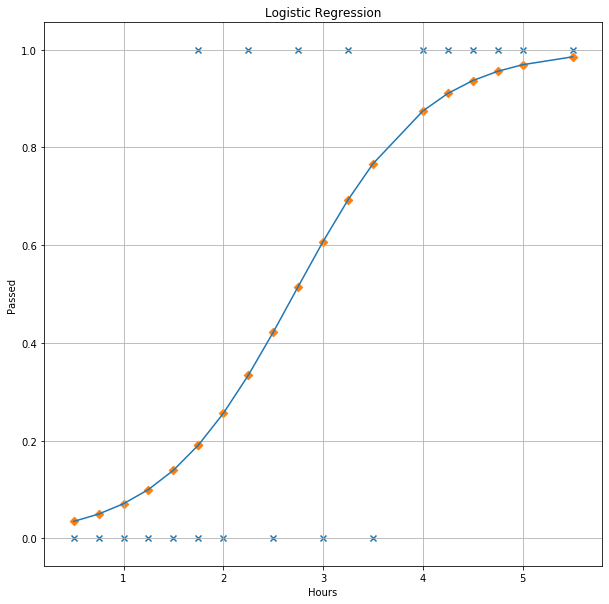

In [9]:
plt.figure(figsize=(10,10))

plt.scatter(Hours, Pass, marker='x')
plt.scatter(Hours, results.fittedvalues, marker='D')

plt.plot(Hours, 1/(1+np.exp(-(results.params[0]+results.params[1]*Hours))))

plt.xlabel('Hours'), plt.ylabel('Passed')
plt.title('Logistic Regression')
plt.grid(True);

---

##### Maximum Likelihood via Gradient Ascent

In [10]:
def row_based_gradient_descent_numerical(Hours, Pass, beta, learning_rate, precision, delta_epsilon, max_iterations):
    X = sm.add_constant(Hours)
    for i in range(max_iterations):
        for idx in range(len(Pass)):

            fwd_diff_0 = -Pass[idx] * X[idx].T @ (beta + np.array([delta_epsilon, 0])) + \
                        np.log(1 + np.exp(X[idx].T @ (beta + np.array([delta_epsilon, 0]))))
            
            bwd_diff_0 = -Pass[idx] * X[idx].T @ (beta - np.array([delta_epsilon, 0])) + \
                        np.log(1 + np.exp(X[idx].T @ (beta - np.array([delta_epsilon, 0]))))
            
            gradient_vector_0 = (fwd_diff_0 - bwd_diff_0) / (2.0 * delta_epsilon)
            
            fwd_diff_1 = -Pass[idx] * X[idx].T @ (beta + np.array([0, delta_epsilon])) + \
                        np.log(1 + np.exp(X[idx].T @ (beta + np.array([0, delta_epsilon]))))
            
            bwd_diff_1 = -Pass[idx] * X[idx].T @ (beta - np.array([0, delta_epsilon])) + \
                        np.log(1 + np.exp(X[idx].T @ (beta - np.array([0, delta_epsilon]))))
            
            gradient_vector_1 = (fwd_diff_1 - bwd_diff_1) / (2.0 * delta_epsilon)
            
            next_beta = beta - learning_rate * np.array([gradient_vector_0, gradient_vector_1])
            if np.fabs(next_beta - beta).all() < precision.all():
                print('Terminated at iteration: {}'.format(i))
                return next_beta
            beta = next_beta
    print('Terminated. Max iterations reached.')
    return next_beta

In [11]:
beta_0 = np.ones(2)
learning_rate = 0.05
precision_ = np.full(2, 0.000001)
max_iterations = 5000
delta_epsilon = 0.000001

betas_rbn = row_based_gradient_descent_numerical(Hours, Pass, beta_0, learning_rate, precision_, delta_epsilon, max_iterations)
print('Weights (row-based numerical solution): ', betas_rbn)

Terminated. Max iterations reached.
Weights (row-based numerical solution):  [-4.20915833  1.54325118]


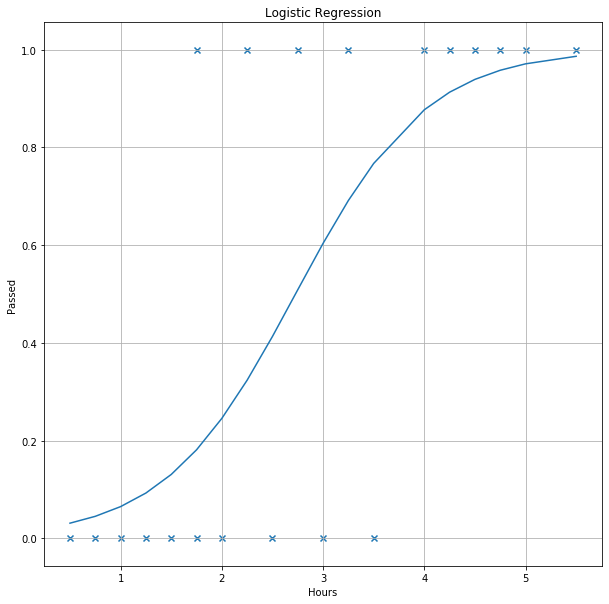

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(Hours, Pass, marker='x')
plt.plot(Hours, 1/(1+np.exp(-(betas_rbn[0]+betas_rbn[1]*Hours))))
plt.xlabel('Hours'), plt.ylabel('Passed')
plt.title('Logistic Regression')
plt.grid(True);

<hr/>

#### Poisson Regression

$ \lambda = e^{\mathbf{x} \mathbf{\beta}} $

$
\begin{align}
P\{Y_i=y_i \mid \mathbf{x_i} \text{, } \mathbf{\beta}\} &= \frac{e^{-\lambda}\lambda^{y_i}}{y_i !} \\
&=  \frac{ e^{-e^{(\mathbf{x^T_i}\mathbf{\beta}})} e^{(\mathbf{x^T_i} \mathbf{\beta})^{y_i}} }{y_i !}
\end{align}
$

##### Log-likelihood

$
\begin{align}
L \{\mathbf{\beta} \mid \mathbf{X}, Y \}
&= \Pi^n_{i=1} \frac{ e^{-e^{(\mathbf{x^T_i}\mathbf{\beta}})} e^{(\mathbf{x^T_i} \mathbf{\beta}) y_i} }{y_i !} \\
\end{align}
$

$
\begin{align}
\ell(\beta)
&= \sum^{n}_{i=1} log(\frac{ e^{-e^{(\mathbf{x^T_i}\mathbf{\beta}})} e^{(\mathbf{x^T_i} \mathbf{\beta})^{y_i}} }{y_i !}) \\
&= \sum^{n}_{i=1} \{ (-e^{\mathbf{x^T_i}\mathbf{\beta}}) log(e) + (\mathbf{x^T_i} \mathbf{\beta} y_i) log(e) - log(y_i !) \} \\
&= -\sum^{n}_{i=1} e^{\mathbf{x^T_i}\mathbf{\beta}} + \sum^{n}_{i=1} (\mathbf{x^T_i} \mathbf{\beta} y_i) - \sum^{n}_{i=1} log(y_i !) \\
\end{align}
$

##### Log link function
- $log(\lambda) = \mathbf{x} \mathbf{\beta}$

***

In [13]:
poisson_data = pd.read_csv('poisson_simulated.txt', sep='\t')
poisson_data.head()

,i,x,y
0,1,2,0
1,2,15,6
2,3,19,4
3,4,14,1
4,5,16,5


In [14]:
endog = poisson_data.loc[:,'y']
exog = poisson_data.loc[:,'x']

In [15]:
logistic_model = sm.GLM(endog, sm.add_constant(exog), family=sm.families.Poisson())
results = logistic_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.251
Date:                Sun, 16 Aug 2020   Deviance:                       27.842
Time:                        00:31:23   Pearson chi2:                     26.1
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3079      0.289      1.064      0.287      -0.259       0.875
x              0.0764      0.017      4.413      0.000       0.042       0.110
==============================================================================
"""